# Chart Visualization

The examples below assumes that you are using Jupyter

In [272]:
import narwhals as nw
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import csv


In [273]:
def func(df_any):
    df_nw = nw.from_native(df_any)   
    df = df_nw.select(
        a_sum = nw.col('Population (historical estimates)').sum(),
        a_mean = nw.col('Population (historical estimates)').mean(),
        a_std = nw.col('Population (historical estimates)').std()
    )    

    return nw.to_native(df)

In [274]:
'''
Import the data for the demonstration
'''
data = pd.read_csv('docs/basics/data/population.csv')

country_list = []

with open('docs/basics/data/data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        country_list.append(row[0])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58252 entries, 0 to 58251
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             58252 non-null  object
 1   Code                               54971 non-null  object
 2   Year                               58252 non-null  int64 
 3   Population (historical estimates)  58252 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ MB
None


In [275]:
@nw.narwhalify
def filter_rows(df):
    df = df.rename({"Population (historical estimates)": "Population"})

    is_country = df.with_columns(is_country=nw.col("Entity").is_in(country_list)).filter(nw.col('is_country') & nw.col('Year') > 0)

    return is_country.group_by(['Year']).agg(nw.col('Population').sum().alias('Global Population')).sort('Year')

In [276]:
pd_df = filter_rows(data)

Text(-90, -10, 'Max: 7.19B')

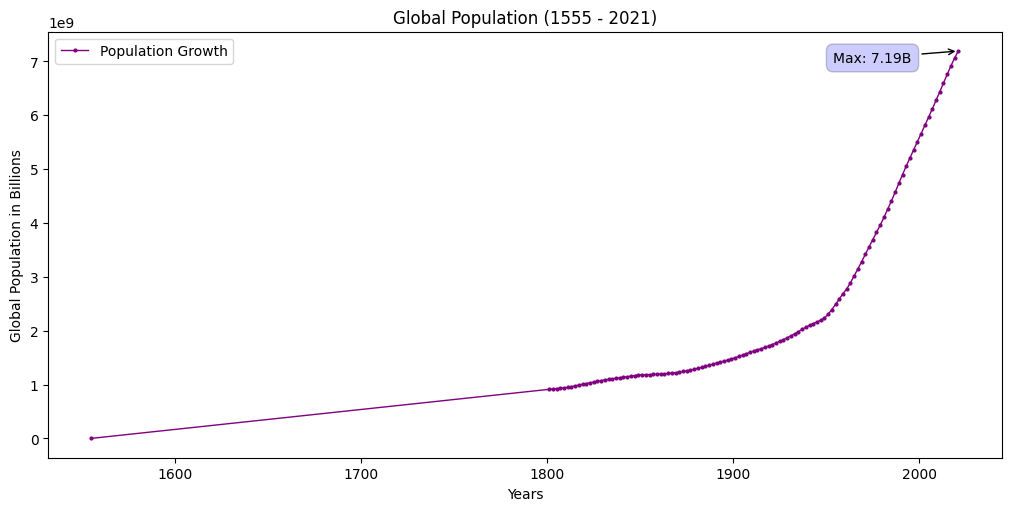

In [277]:
plt.figure(figsize=(10, 5), layout = 'constrained', )
plt.plot(pd_df['Year'], pd_df['Global Population'], label = 'Population Growth', linewidth=1, marker='o', markersize=2, color='purple')
plt.ylabel('Global Population in Billions')
plt.xlabel('Years')
plt.title('Global Population (1555 - 2021)')
plt.legend()

max_population = pd_df['Global Population'].max()
max_year = pd_df.loc[pd_df['Global Population'].idxmax(), 'Year']
unit = 1000000000

plt.annotate(f'Max: {max_population/unit:.2f}B', xy=(max_year, max_population), 
             xytext=(-90, -10), textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


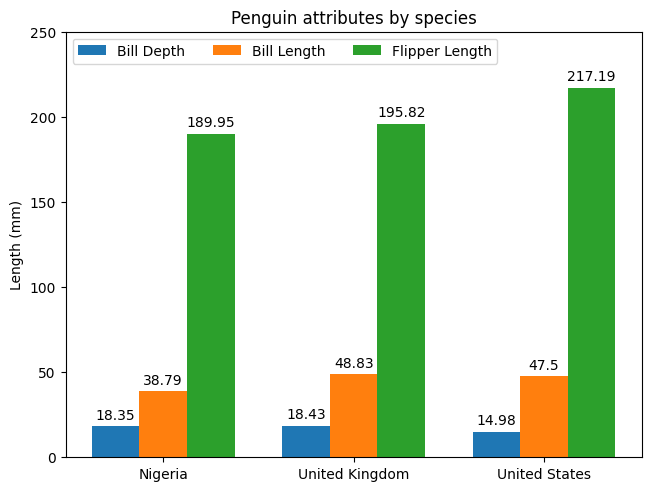

{'Entity': {0: 'Nigeria', 1: 'United Kingdom', 2: 'United States'}, 'Max Population': {0: 213401328, 1: 67281040, 2: 336997632}, 'Min Population': {0: 12100860, 1: 10866183, 2: 6113782}, 'Std Population': {0: 48670759.705962926, 1: 15026029.033909237, 2: 100139033.56136248}, 'Mean Population': {0: 44358023.576576576, 1: 41227313.72072072, 2: 117094573.66666667}}


In [278]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

countries = ('Nigeria', 'United Kingdom', 'United States')
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

def func(df_any):
    df_nw = nw.from_native(df_any)
    countries = ('Nigeria', 'United Kingdom', 'United States')
    df_nw = df_nw.rename({"Population (historical estimates)": "Population"})

    is_country = df_nw.with_columns(is_country=nw.col("Entity").is_in(countries)).filter(nw.col('is_country') & nw.col('Year') > 0)

    df = is_country.group_by(['Entity']).agg(nw.col('Population').max().alias('Max Population'),
                                             nw.col('Population').min().alias('Min Population'),
                                             nw.col('Population').std().alias('Std Population'),
                                             nw.col('Population').mean().alias('Mean Population')).sort('Entity')

    return nw.to_native(df).to_dict()

print(func(data))



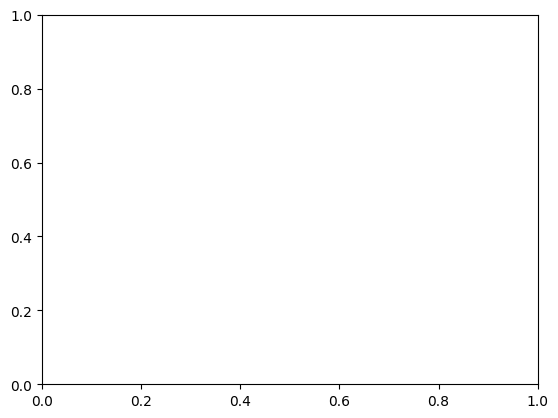

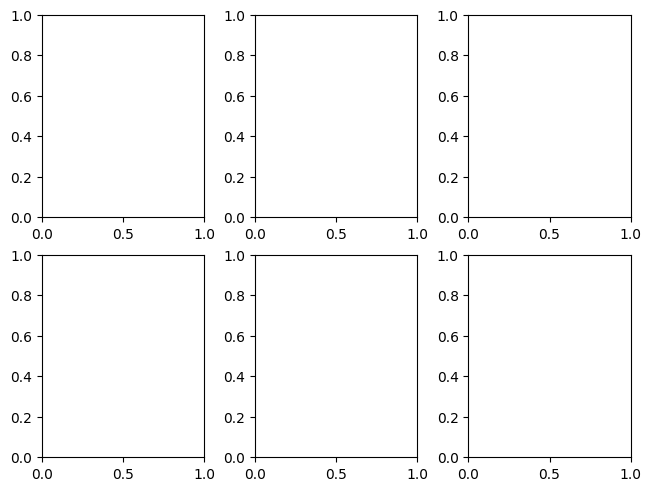

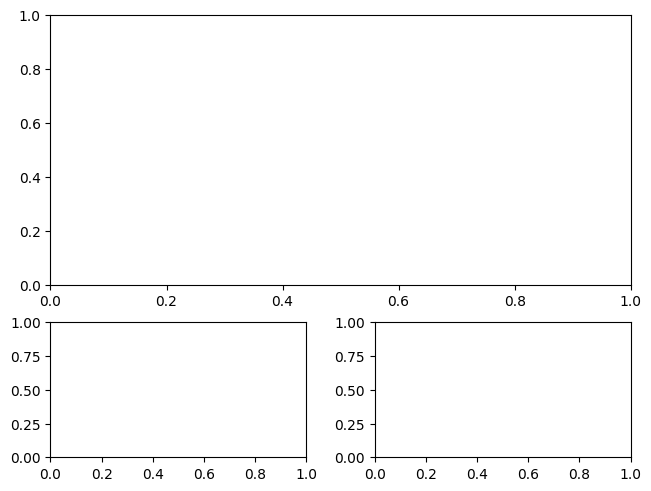

In [279]:

fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 3, layout = 'constrained')  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['top', 'top', 'top', 'top'],
                               ['top', 'top', 'top', 'top'], ['bottom-left', 'bottom-left', 'b', 'b']], layout = 'constrained')